In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_array =cv2.imread ("Training_dataset/Closed_Eyes/s0001_00139_0_0_0_0_0_01.png", cv2.IMREAD_GRAYSCALE)

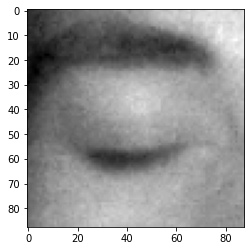

In [3]:
plt.imshow(img_array, cmap="gray")

In [4]:
img_array.shape

(88, 88)

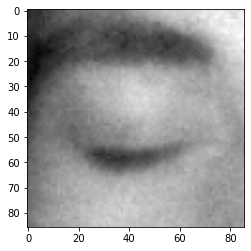

In [7]:
DataDirectory = "Training_dataset/"
Classes = ["Closed_Eyes", "Open_Eyes"]
for category in Classes:
    path = os.path.join(DataDirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

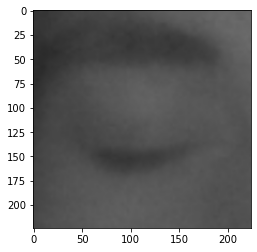

In [8]:
img_size = 224

new_array = cv2.resize(backtorgb, (img_size, img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

###  Reading all the image and convert them into an array for data and labels

In [9]:
training_data = []

def create_training_data():
    for category in Classes:
        path = os.path.join(DataDirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

In [10]:
create_training_data()

In [11]:
print(len(training_data))

23540


In [12]:
import random

random.shuffle(training_data)   #shuffle to prevent overfitting

In [13]:
x = []
y = []

for features, label in training_data:
    x.append(features)
    y.append(label)
    
X = np.array(x).reshape(-1, img_size, img_size, 3)

In [14]:
X.shape

(23540, 224, 224, 3)

In [15]:
# normalise the data
X = X/255.0

In [16]:
Y = np.array(y)

In [17]:
import pickle

pickle_out = open("x.pickle", "wb")
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [18]:
pickle_in = open("x.pickle", "rb")
x = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

### deep learning model for training-learning

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [20]:
model = tf.keras.applications.mobilenet.MobileNet()

In [21]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

### Transfer Learning

In [22]:
base_input = model.layers[0].input  ##input

In [23]:
base_output = model.layers[-4].output

In [24]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)   ## one node (1/0)
final_output = layers.Activation('sigmoid')(final_output)

In [25]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [24]:
# for layer in model.layers:
#    layer.trainable = false

In [26]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

## settings for binary classification

In [27]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [28]:
history = new_model.fit(X, Y, epochs = 10, validation_split = 0.1) ## training

Epoch 1/10
663/663 [==============================] - 2375s 3s/step - loss: 0.0456 - accuracy: 0.9868 - val_loss: 0.0267 - val_accuracy: 0.9928
Epoch 2/10
663/663 [==============================] - 2155s 3s/step - loss: 0.0166 - accuracy: 0.9950 - val_loss: 0.0191 - val_accuracy: 0.9958
Epoch 3/10
663/663 [==============================] - 2063s 3s/step - loss: 0.0144 - accuracy: 0.9955 - val_loss: 0.0135 - val_accuracy: 0.9953
Epoch 4/10
663/663 [==============================] - 2132s 3s/step - loss: 0.0157 - accuracy: 0.9951 - val_loss: 0.0128 - val_accuracy: 0.9958
Epoch 5/10
663/663 [==============================] - 2092s 3s/step - loss: 0.0110 - accuracy: 0.9968 - val_loss: 0.0150 - val_accuracy: 0.9949
Epoch 6/10
663/663 [==============================] - 2144s 3s/step - loss: 0.0105 - accuracy: 0.9968 - val_loss: 0.0344 - val_accuracy: 0.9919
Epoch 7/10
663/663 [==============================] - 2164s 3s/step - loss: 0.0124 - accuracy: 0.9960 - val_loss: 0.0266 - val_accuracy:

In [29]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


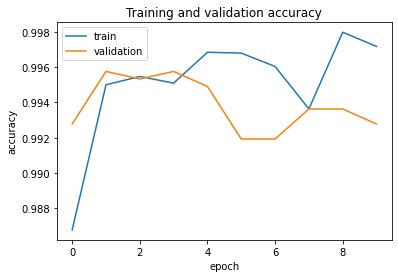

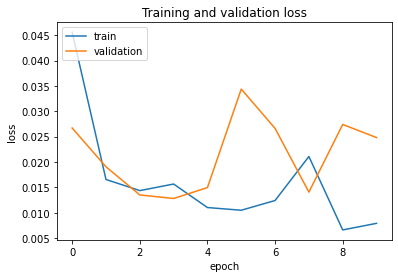

In [30]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [31]:
new_model.save('my_model_4.h5')

In [59]:
new_model = tf.keras.models.load_model('my_model_3.h5')

In [33]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

## Checking the network for predicitions

In [34]:
img_array = cv2.imread('s0018_00021_0_0_0_0_1_01.png', cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size, img_size))

In [35]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [36]:
X_input.shape

(1, 224, 224, 3)

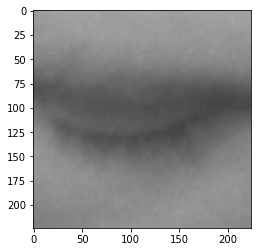

In [37]:
plt.imshow(new_array)

In [38]:
X_input = X_input/255.0

In [39]:
prediction = new_model.predict(X_input)

In [40]:
prediction

array([[2.3434657e-08]], dtype=float32)

## Check on unknown image

In [41]:
img = cv2.imread('selfie.jpg')

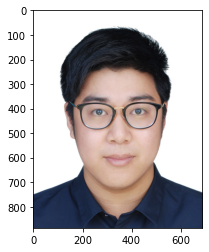

In [42]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [43]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [44]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye_tree_eyeglasses.xml')

In [45]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [46]:
eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)

In [48]:
for(x,y,w,h) in eyes:
    cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)

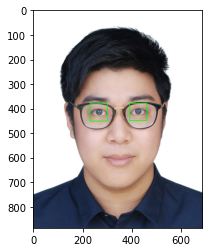

In [49]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## cropping the Eye image

In [50]:
# cropping
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye_tree_eyeglasses.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # print(faceCascade.empty())
eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
for x, y, w, h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print("eyes are not detected")
    else:
        for (ex, ey, ew, eh) in eyess:
            eyes_roi = roi_color[ey: ey+eh, ex: ex+ew]

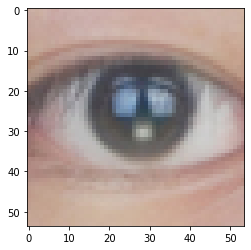

In [51]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [52]:
eyes_roi.shape

(54, 54, 3)

In [53]:
final_image = cv2.resize(eyes_roi, (224,224))
final_image = np.expand_dims(final_image, axis = 0) ## need fourth dimension
final_image = final_image/255.0

In [54]:
final_image.shape

(1, 224, 224, 3)

In [55]:
new_model.predict(final_image)

array([[1.]], dtype=float32)

# Realtime Video Demo
## first detect that eyes are closed or open

In [60]:
import cv2
path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)
#Check if the webcam is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
while True:
    ret,frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye_tree_eyeglasses.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #print(faceCascade.empty())
    eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print('eyes are not detected')
        else:
            for (ex, ey, ew, eh) in eyess:
                eyes_roi = roi_color[ey:ey + eh, ex:ex + ew]
                
    final_image = cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims(final_image, axis = 0) ## need fourth dimension
    final_image = final_image/255.0
    
    Predictions = new_model.predict(final_image)
    if (Predictions>0.5):
        status = "Open Eyes"
    else:
        status = "Closed Eyes"
        
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    
    # Draw rectangle around the faces
    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)
        
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    # use putText() method for increasing text on video
    
    cv2.putText(frame, status, (50, 50), font, 3, (0, 0, 255), 2, cv2.LINE_4)
    cv2.imshow('Driver Fatigue Detection', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyALLWindows()
        

False
False
eyes are not detected
False
False
False
False
False
False
False
False
eyes are not detected
False
False
False
False
False
eyes are not detected
False
False
False
False
eyes are not detected
False
eyes are not detected
False
eyes are not detected
False
eyes are not detected
False
False
eyes are not detected
False
False
False
False
False
False
False
eyes are not detected
False
False
eyes are not detected
False
False
False
False
False
eyes are not detected
False
eyes are not detected
False
False
False
False
False
False
False
False
eyes are not detected
False
False
False
False
False
False
False
False
eyes are not detected
False
False
False
False
eyes are not detected
False
False
False
False
False
False
False
False
False
False
False
eyes are not detected
False
eyes are not detected
False
eyes are not detected
False
False
eyes are not detected
False
eyes are not detected
False
False
False
False
False
False
False
False
eyes are not detected
False
False
False
eyes are not detected


KeyboardInterrupt: 

## if eyes are closed for unusual time, like more than blinks, for few seconds, alarm Generated

In [61]:
import winsound
frequency = 1500 # Set Frequency To 1500 Hertz
duration = 1000  # Set Duration To 1000
import numpy as np
import cv2
path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)
#Check if the webcam is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
counter = 0    
while True:
    ret,frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye_tree_eyeglasses.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #print(faceCascade.empty())
    eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print('eyes are not detected')
        else:
            for (ex, ey, ew, eh) in eyess:
                eyes_roi = roi_color[ey:ey + eh, ex:ex + ew]
                
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    
    #Draw a rectangle around the face
    for(x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    #Use putTEXT() method for inserting text on video
                
    final_image = cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims(final_image, axis = 0) ## need fourth dimension
    final_image = final_image/255.0
    
    Predictions = new_model.predict(final_image)
    if (Predictions>0.5):
        status = "Open Eyes"
        cv2.putText(frame, status, (150, 150), font, 3, (0, 255, 0), 2, cv2.LINE_4)
        x1, y1, w1, h1 = 0, 0, 175, 75
        # Draw black background rectangle
        
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        cv2.putText(frame, 'Active', (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
    else:
        counter = counter + 1
        status = "Closed Eyes"
        cv2.putText(frame, status, (150, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
        if counter > 5:
            x1,y1,w1,h1 = 0,0,175,75
            # Draw black backgrond rectangle
            cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
            # Add text
            cv2.putText(frame, 'Sleep Alert!!', (x1+int(w1/10), y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)
            winsound.Beep(frequency, duration)
            counter = 0
            
    
    cv2.imshow('Driver Fatigue Detection', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyALLWindows()
        

False
False
False
False
False
False
False
False
False
False
False
False
False
eyes are not detected
False
False
False
False
eyes are not detected
False
False
eyes are not detected
False
False
False
eyes are not detected
False
False
False
eyes are not detected
False
False
False
False
False
False
False
False
False
eyes are not detected
False
False
False
False
eyes are not detected
False
False
eyes are not detected
eyes are not detected
False
False
False
False
False
False
False
False
False
False
eyes are not detected
False
False
False
False
False
False
False
False
eyes are not detected
False
False
False
False
False
eyes are not detected
False
eyes are not detected
False
False
False
False
False
False
False
eyes are not detected
False
eyes are not detected
eyes are not detected
False
eyes are not detected
False
False
False
False
False
False
False
False
eyes are not detected
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
eyes

KeyboardInterrupt: 